## Import Statements

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import Counter

In [2]:
df = pd.read_csv('Combined_Social_Data.csv')

C:\Users\oldye\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(993810, 44)

In [8]:
df.head(3).T

,0,1,2
Unnamed: 0,0,1,2
Facebook,1,1,1
Instagram,0,0,0
Twitter,0,0,0
Youtube,0,0,0
age,26,26,26
artist_name_x,21Savage,21Savage,21Savage
artist_name_y,21 Savage,21 Savage,21 Savage
count_of_followers,NaN,NaN,NaN
created,5/18/15 19:24,5/25/15 16:00,5/25/15 22:26


In [13]:
top_5 = ['Justin Timberlake', 'Maluma', 'Pink', 'Avril Lavigne', 'Willie Nelson']
df = df[df['artist_name_y'].isin (top_5)]

In [15]:
print(df.shape)
Counter(df['artist_name_y'])

(30553, 44)


Counter({'Maluma': 16816,
         'Willie Nelson': 4570,
         'Avril Lavigne': 2695,
         'Justin Timberlake': 3117,
         'Pink': 3355})

In [110]:
df_mb = pd.read_csv('musicbrainz_data.csv')

In [138]:
df_mb['release_date'] = pd.to_datetime(df_mb['release_date'])

In [139]:
df_mb.head(2)

,Unnamed: 0,artist_name,title,release_date,primary_type
0,0,21 Savage,Savage,1982-01-01,Album
1,1,21 Savage,Savage Mode,2016-07-15,Album


##### Data Clean

In [25]:
#Drop all social engagement score = NAN
df.dropna(subset=['social_engagement_score'], inplace=True)

In [26]:
df.shape

(25232, 44)

In [66]:
#Average social_engagement scores by channel
social_channels = ['Facebook', 'Instagram', 'Twitter', 'Youtube']
for social in social_channels:
    print(social, " average score is: ", df[df[social] == 1]['social_engagement_score'].mean())

Facebook  average score is:  0.0043924376086625205
Instagram  average score is:  0.025580819602437795
Twitter  average score is:  0.0006220480809761633
Youtube  average score is:  6.178918149258157


## First Artist (Justin Timberlake)

In [33]:
df_justin = df[df['artist_name_y'] == 'Justin Timberlake']

In [113]:
df_mb_justin = df_mb[df_mb['artist_name'] == 'Justin Timberlake']

In [143]:
df_mb_justin.sort_values('release_date', inplace=True)

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


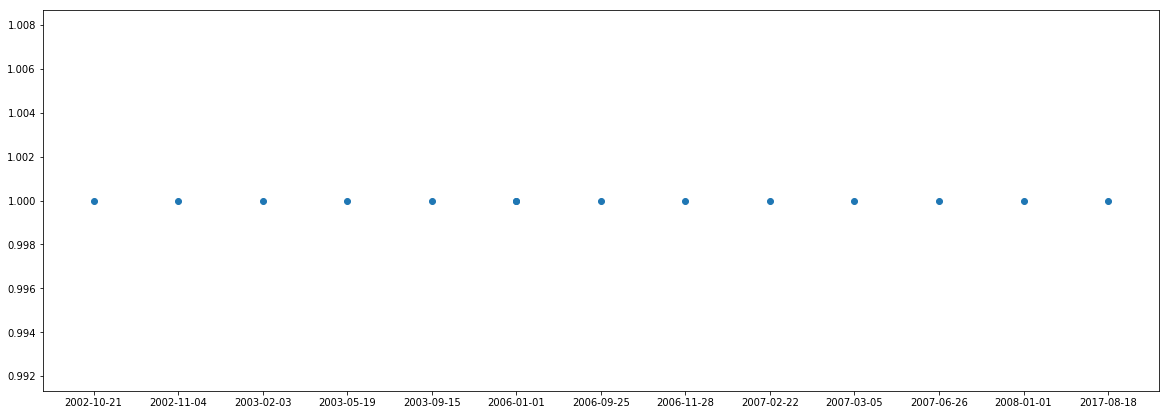

In [145]:
y = [1] * len(df_mb_justin['release_date'])
df_mb_justin['release_date']
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,1,1)
ax.scatter(df_mb_justin['release_date'],y)

In [160]:
df_mb_justin = df_mb_justin[pd.to_datetime(df_mb_justin['release_date'])>pd.to_datetime(min(df_justin['created']))]

In [161]:
df_mb_justin

,Unnamed: 0,artist_name,title,release_date,primary_type
834,834,Justin Timberlake,Lullaby Renditions of Justin Timberlake,2017-08-18,Album


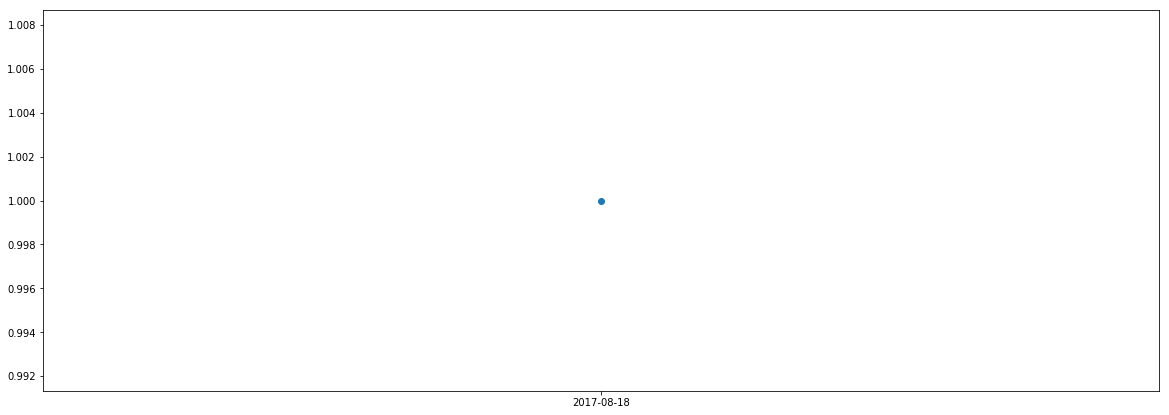

In [162]:
y = [1] * len(df_mb_justin['release_date'])
df_mb_justin['release_date']
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,1,1)
ax.scatter(df_mb_justin['release_date'],y)

In [65]:
#Average social_engagement scores by channel
social_channels = ['Facebook', 'Instagram', 'Twitter', 'Youtube']
for social in social_channels:
    print(social, " average score is: ", df_justin[df_justin[social] == 1]['social_engagement_score'].mean())

Facebook  average score is:  0.0011089281750000003
Instagram  average score is:  0.0171043810398623
Twitter  average score is:  0.0002114041755736423
Youtube  average score is:  9.568330678523816


In [71]:
#Removing Youtube due to outweight
social_channels = ['Facebook', 'Instagram', 'Twitter', 'Youtube']

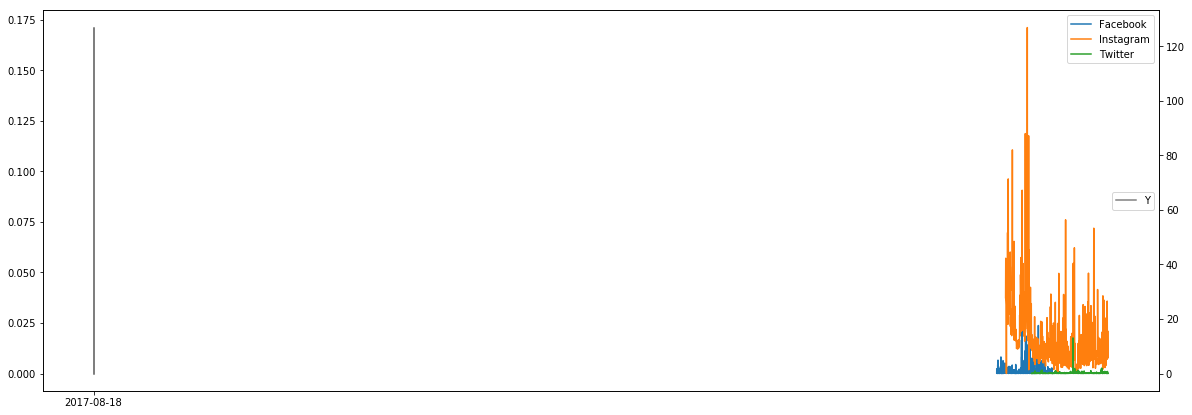

In [164]:
#Creates a date range for each social media platform and uses # of periods equal to # of posts for X axis.
#For y axis, only grabs the social engagement scores for that platform

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,1,1)
ax2 = ax.twinx()
#markers_on = [1,10, 50, 70]
for social in social_channels:
    daterange = pd.date_range(min(df_justin[df_justin[social]==1]['created']),
                                max(df_justin[df_justin[social]==1]['created']),
                                periods=len(df_justin[df_justin[social] == 1]['social_engagement_score']))
    if (social == 'Youtube'):
        ax2.plot(daterange,df_justin[df_justin[social] == 1]['social_engagement_score'],'C7')
    else:
        ax.plot(daterange,df_justin[df_justin[social] == 1]['social_engagement_score'])

ax.legend(social_channels[:3]) 
ax2.legend('Youtube',loc=5)   #Not sure why just a 'Y' is showing      

#-------------------------------------------------------------------------------
#Plotting the dots for release dates
#Not quite working correctly atm


y = [.1] * len(df_mb_justin['release_date'])

#daterange2 = pd.date_range(min(df_justin['created']),
#                            max(df_justin['created']),
#                            periods=len(df_justin['social_engagement_score']))

ax.plot(df_mb_justin['release_date'], y)


plt.show()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4)) #how to get to show months instead?

# 